Mike (Mingsi) Gu <br>
CMSC 25300 <br>
PSET 2 

1.

a) 3 is rank of X 

b) w = (\[\[0, 0, 1\], \[0, 1, -1\], \[1, -1, 0\]\])(y) 

2.

a) Yes, because the right column cannot be expressed as a linear multiple of the left.

b) Yes, because none of the columns can be expressed as weighted sums of the others.

c) No, reduced echelon form has 2 nonzero rows: 
\[\[1, 2, 2\], \[0, 1, .5\], \[0, 0, 0\]\]

d) Rank is 2, reduced echelon form has 2 nonzero rows: 
\[\[1, 2/5\], \[0, 1\], \[0, 0\]\]

e) A unique solution exists because (X^t)(X) is invertible. It is full rank. <br> ((X^t)(X) = \[\[75, -10\], \[-10, 12\]\] and rank = 2)

3.

a) w = (((X^t*X)^-1)*X^t)*y = \[\[1/3\], \[-1/3\]\]

b) 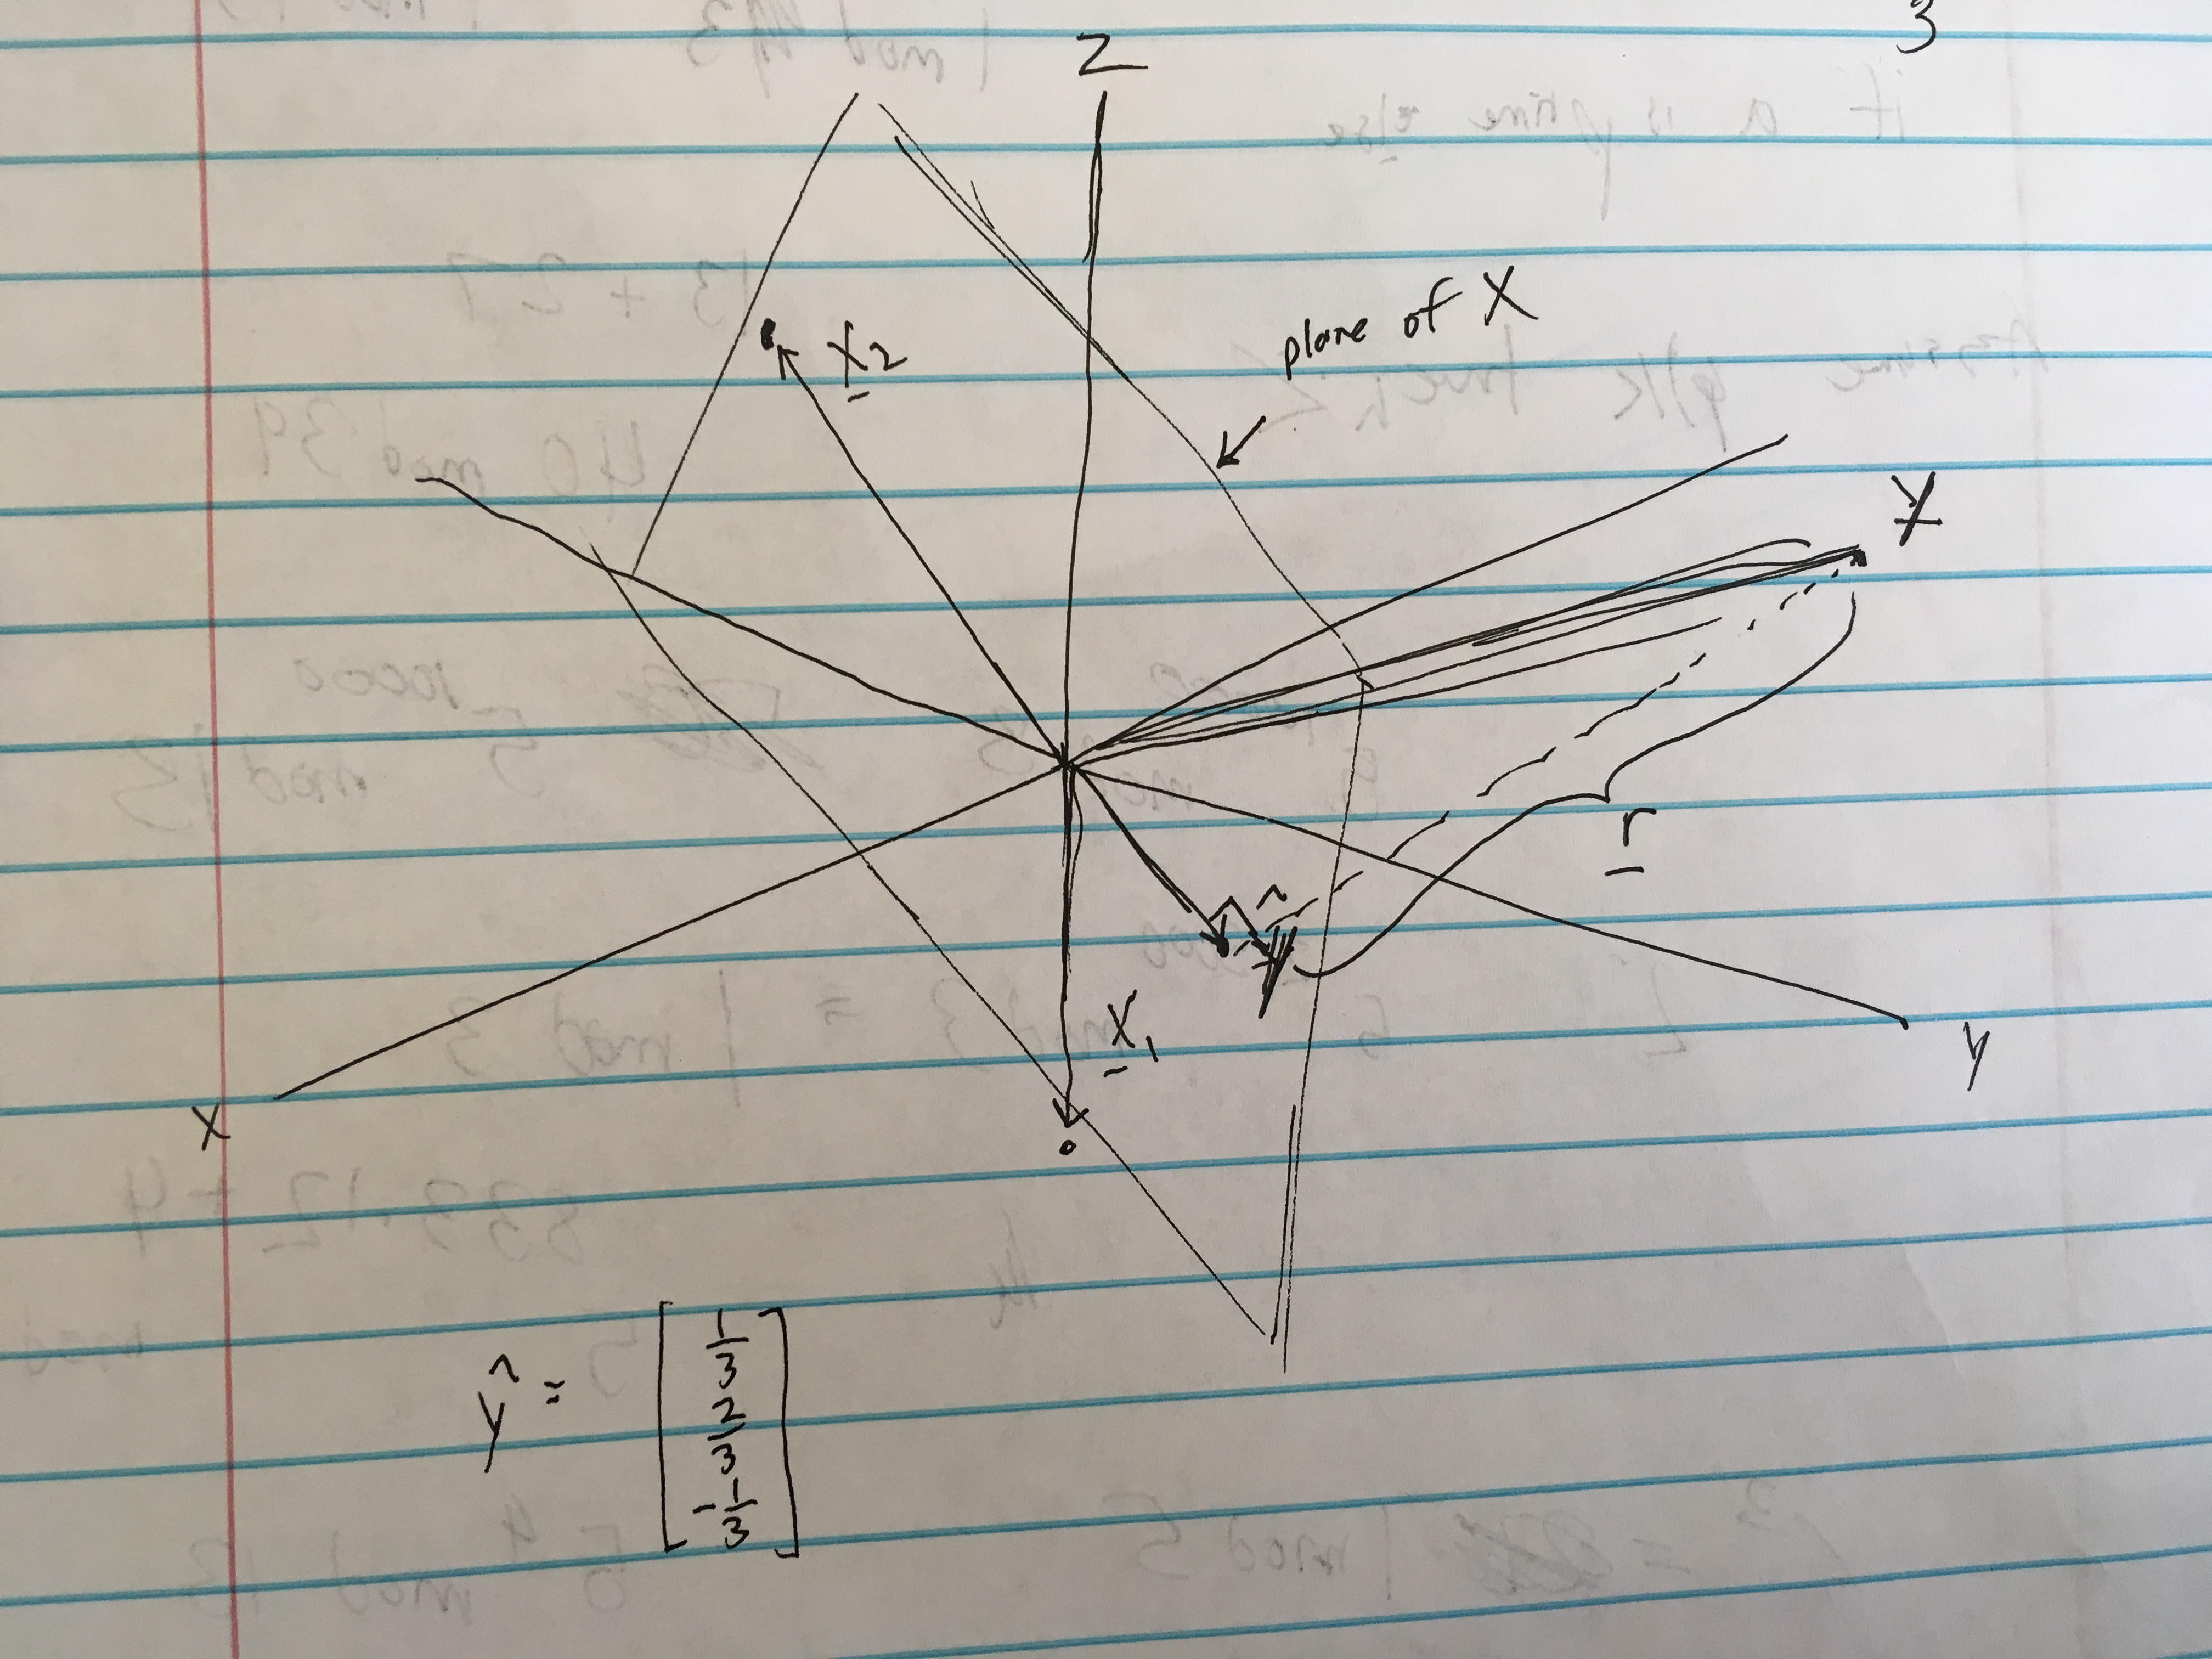

In [241]:
#4.
from scipy.io import loadmat
import numpy as np
data = loadmat('face_emotion_data.mat')

In [242]:
#a)
x = data['X']
y = data['y']
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(x), x)), np.transpose(x)), y)
w

array([[ 0.94366942],
       [ 0.21373778],
       [ 0.26641775],
       [-0.39221373],
       [-0.00538552],
       [-0.01764687],
       [-0.16632809],
       [-0.0822838 ],
       [-0.16644364]])

b)
Multiply weights by features from new face. If the result is closer to 1, happy. If closer to -1, sad.

c) 
The first feature seems to be the most important given the absolute value of its corresponding weight is the highest. The fourth feature is the second most important even though it corresponds to the most negative weight, because it biases the result in the opposite direction of the feature strongly. 

d) 
I would choose the 3 most important features, ie: 1st, 4th, and 3rd features. 
With the 3 weights corresponding to these features, we could build a linear classifier. (multiply weights by corresponding features)

In [243]:
#e

def crossval(x, y, cv):
    xrows = len(x)
    cvsplit = int(xrows / cv)
    errors = []
    for k in range(cv):
        xslices = []
        yslices = []
        for i in range(0, int(xrows), cvsplit):
            if i != (k * cvsplit):
                xslices.append(x[i:i + cvsplit])
                yslices.append(y[i:i + cvsplit])
        xholdout = x[k: k + cvsplit]
        yholdout = y[k: k + cvsplit]
        
        weights = []
        for p in range(len(xslices)):
            x0 = xslices[p]
            y0 = yslices[p]
            w0 = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(x0), x0)), np.transpose(x0)), y0)
            weights.append(w0)
        final_weight = np.zeros(x.shape[1])
        for weight in weights:
            for m, w1 in enumerate(weight):
                final_weight[m] += w1
        final_weight /= (cv - 1)
        ypred = np.matmul(xholdout, final_weight)
        for l, result in enumerate(ypred):
            if result >= 0:
                ypred[l] = 1
            elif result < 0:
                ypred[l] = -1
        mistakes = ypred - yholdout.flatten()
        error = (cvsplit - list(mistakes).count(0)) / cvsplit
        errors.append(error)
    final_error = np.average(errors)
    return final_error

#f

print('For all 9 features, error rate is:', crossval(x, y, 8))

topx = [[],[],[]]
topx[0] = x[:, 1]
topx[1] = x[:, 4]
topx[2] = x[:, 3]
topx = np.transpose(np.array(topx))

print('For 3 most important features, error rate is:', crossval(topx, y, 8))  

For all 9 features, error rate is: 0.109375
For 3 most important features, error rate is: 0.2890625


5.

a)
p(z) = c0 + c1\*x + c2\*x^2 + ... + cd\*x^d =(approx) y

b) 
X is a (d by d) size matrix with Xij = x_i\*\*j. y is vector of measured responses.


In [244]:
import matplotlib.pyplot as plt
polydata = loadmat('polydata.mat')

In [245]:
polyx = polydata['x']
polyy = polydata['y']

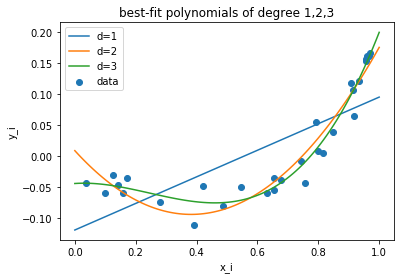

In [246]:
#c) 

def sumx(x, y, d):
    X = np.zeros([len(x), d])
    ymat = np.zeros([d, 1])
    xtot, ytot = [], []
    for i, x0 in enumerate(x):
        for d0 in range(d):
            X[i, d0] = x0[0]**d0
    return X, y

def polyappx(x, w, d):
    xl = []
    #w = [1,1,1]
    for x5 in x:
        sumofx = 0
        for i in range(d):
            sumofx += (x5**i) * w[i]
        xl.append(sumofx)
    return xl

yplots = []
for deg in [2,3,4]:
    mx, my = sumx(polyx, polyy, deg)
    polyw = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(mx), mx)), np.transpose(mx)), my)
    yappx = polyappx(np.linspace(0, 1, 100), np.array(polyw).flatten(), deg)
    yplots.append(yappx)
    
plt.figure()
plt.plot(np.linspace(0, 1, 100), yplots[0], label='d=1')
plt.plot(np.linspace(0, 1, 100), yplots[1], label='d=2')
plt.plot(np.linspace(0, 1, 100), yplots[2], label='d=3')
plt.xlabel('x_i')
plt.ylabel('y_i')
plt.title('best-fit polynomials of degree 1,2,3')
plt.scatter(polyx, polyy, label='data')
plt.legend()
plt.show()

In [10]:
import numpy as np
mx = [[1,2], [2,-1], [-3,2]]
my = [[0], [1], [-1]]
polyw = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(mx), mx)), np.transpose(mx)), my)
polyw

array([[ 0.3       ],
       [-0.13333333]])

In [ ]:
np.transpose

In [ ]:
np.linalg.inv

In [8]:
x1 = [[2,4,6],[3,2,5],[3,5,8],[4,7,9]]
x2 = np.copy(x1)
D = np.zeros([4,4])
for i, a in enumerate(x1):
    for j, b in enumerate(x2):
        D[i, j] = np.inner(a,a) - 2*(np.inner(a, b)) + np.inner(b,b)
D

array([[ 0.,  6.,  6., 22.],
       [ 6.,  0., 18., 42.],
       [ 6., 18.,  0.,  6.],
       [22., 42.,  6.,  0.]])

In [9]:
np.linalg.matrix_rank(D)

4